# 텍스트 전처리 기초 1

220526


## 1) 자소 분리

- 영어는 소문자(a\~z), 대문자(A\~Z)로 이루어진 알파벳 52자로 모든 글자 표현 가능

- 한국어는 초성(ㄱ\~ㅎ)+중성(ㅏ\~ㅣ)+종성(ㄱ\~ㅎ) 으로 이루어진 음절의 개수가 11,172개로 글자가 매우 많음. 연산량이 많이 필요

- 때론 음절을 자모 단위로 분리하여 분석하는게 유리할 수 있음 

In [1]:
# install
!pip install hgtk

#### 1.1) 자소분리 실습

In [37]:
import hgtk
# Decompose character
hgtk.letter.decompose('걀')

('ㄱ', 'ㅑ', 'ㄹ')

In [3]:
# Compose character
hgtk.letter.compose('ㄱ', 'ㅏ', 'ㅁ')

'감'

In [4]:
# Decompose sentence
hgtk.text.decompose('학교종이 땡땡땡! hello world 1234567890 ㅋㅋ!')

'ㅎㅏㄱᴥㄱㅛᴥㅈㅗㅇᴥㅇㅣᴥ ㄸㅐㅇᴥㄸㅐㅇᴥㄸㅐㅇᴥ! hello world 1234567890 ㅋᴥㅋᴥ!'

In [5]:
# Compose sentence
hgtk.text.compose('ㅎㅏㄱᴥㄱㅛᴥㅈㅗㅇᴥㅇㅣᴥ ㄸㅐㅇᴥㄸㅐㅇᴥㄸㅐㅇᴥ! hello world 1234567890 ㅋᴥㅋᴥ!')

'학교종이 땡땡땡! hello world 1234567890 ㅋㅋ!'

#### 1.2) 한글 텍스트 체크

In [6]:
# 문장이 순수한 한글인지 체크
print(hgtk.checker.is_hangul('한글입니다'))
print(hgtk.checker.is_hangul('no한글입니다'))
print(hgtk.checker.is_hangul('it is english'))

True
False
False


In [7]:
# 문장이 순수한 한자인지 체크
print(hgtk.checker.is_hanja('大韓民國'))
print(hgtk.checker.is_hanja('大한민국'))
print(hgtk.checker.is_hanja('대한민국'))

True
False
False


In [8]:
# 문장이 순수한 영어인지 체크
print(hgtk.checker.is_latin1('abcdefghijklmnopqrstuvwxyz'))
print(hgtk.checker.is_latin1('한글latin1한'))

True
False


In [9]:
# 글자에 받침이 있는지 체크
print(hgtk.checker.has_batchim('한'))  # 'ㄴ
print(hgtk.checker.has_batchim('하'))

True
False


In [10]:
# 조사 체크
print(hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN))
print(hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN))
print(hgtk.josa.attach('하늘', hgtk.josa.I_GA))
print(hgtk.josa.attach('바다', hgtk.josa.I_GA))
print(hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL))
print(hgtk.josa.attach('바다', hgtk.josa.EUL_REUL))
print(hgtk.josa.attach('하늘', hgtk.josa.GWA_WA))
print(hgtk.josa.attach('바다', hgtk.josa.GWA_WA))
print(hgtk.josa.attach('하늘', hgtk.josa.IDA_DA))
print(hgtk.josa.attach('바다', hgtk.josa.IDA_DA))
print(hgtk.josa.attach('하늘', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('바다', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('태양', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('방어', hgtk.josa.RYUL_YUL))
print(hgtk.josa.attach('공격', hgtk.josa.RYUL_YUL))
print(hgtk.josa.attach('반환', hgtk.josa.RYUL_YUL))

하늘은
바다는
하늘이
바다가
하늘을
바다를
하늘과
바다와
하늘이다
바다다
하늘로
바다로
태양으로
방어율
공격률
반환율


## 2) 영어 언어 분석

- 형태소 분석: 의미를 가지는 가장 최소의 단위
    - 단어는 같지만, 품사에 따라 의미가 다르 경우가 존재
    - '못'의 경우 명사로서는 망치를 사용해 목재 따위를 고정하는 물건을 뜻하지만, 부사로서는 '먹는다', '달린다'와 같은 동작 동사를 부정하는 의미로도 쓰임
    - 단어의 의미 파악을 위해선 어떤 품사로 쓰였는지 제대로 파악이 필요

- 구문 분석: 명사구, 동사구 등 문장을 tree로 만듦
- 의미 분석: 같은 단어인 동의어를 주변 의미를 분석하여 컴퓨터가 분석할수 있도록
- 화용 분석: 발화 맥락에 따라 지시체가 바뀌는 ‘나’, ‘지금’, ‘여기’연구. 상호참조해결
- 담화 분석: 챗봇



In [11]:
# 2.1) 문장 분리
import nltk
nltk.download('punkt')

sentences="My name is park. How old are you."
sen=nltk.sent_tokenize(sentences)
print(sen)

['My name is park.', 'How old are you.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
# 2.2) 어절 분리
import nltk
nltk.download('punkt')

# sentences="My name is park"
sentences="I'm hungry"
tokens=nltk.word_tokenize(sentences)
print(tokens)

['I', "'m", 'hungry']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### 어절 분리와 형태소 분석

###### 영어의 띄어쓰기 
- 영어는 복합명사(Machine Learning)나 Don't같은 줄임말만 잘 처리한다면 띄어쓰기 기준으로 토큰화를 해도 잘 작동
- 대부분의 경우에서 단어 단위로 띄어쓰기가 이뤄지기 때문에 띄어쓰기 토큰화가 단어 토큰화와 거의 같음

###### 한국어의 띄어쓰기
- 한국어는 띄어쓰기 만으로는 토큰화가 어려움
- '어절: 띄어쓰기의 단위
- 한국어는 교착어(조사, 어미 등을 붙여 말을 만드는 언어)라서 어절이 독립적인 단어로 구성되는 것이 아니라 조사가 붙은 경우가 많아서 어절 토큰화와 단어 토큰화가 같지 않음!
- 교착어 예시: '그' -> '그가', '그에게', '그를', '그와', '그는' 등 '그' 라는 의미있는 다어에 띄어쓰기 없이 붙어 다른 단어로 구분됨

- 그러므로 한국어 NLP에선 조사를 분리해주는것이 필요

###### 한국어 형태소(morpheme) 분석
- 형태소
    - 자립 형태소: 자립해서 사용할 수 있는 형태소. 자체가 단어
        - 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
    - 의존 형태소: 다른 형태소와 결합하여 사용되는 형태소
        - 접사, 어미, 조사, 어간
    - '우영이가 NLP를 공부한다'
        - 띄어쓰기 단위 분절: ['우영이가', 'NLP를', '공부한다']
        - 자립 형태소: '우영', 'NLP'
        - 의존 형태소: '이가', '를', '공부', '한다'
        - 형태소 단위 분절: ['우영', '이가', 'NLP', '를', '공부', '한다']



In [13]:
# 3.3) 형태소 분석
import nltk
nltk.download('averaged_perceptron_tagger')

sentence="Today, We don't study natural language processing too hard!!"

tokens=nltk.word_tokenize(sentence)
tagged=nltk.pos_tag(tokens)

for tmp in tagged:
    print(tmp)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


('Today', 'NN')
(',', ',')
('We', 'PRP')
('do', 'VBP')
("n't", 'RB')
('study', 'VB')
('natural', 'JJ')
('language', 'NN')
('processing', 'NN')
('too', 'RB')
('hard', 'JJ')
('!', '.')
('!', '.')


![](https://postfiles.pstatic.net/MjAyMTAzMThfMjEz/MDAxNjE2MDc4MDAwMjEy.TlY6Pe0PrTxT9u9JBjP7ZeHRtinJQw6RakQqlmPboqkg.ntHJqheAwTFMy_9TprH-X_40bfFqKdKbP-KPNxnf24Ug.PNG.nabilera1/image.png?type=w966)

In [14]:
# 3.4) 개체명 인식
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sentence="Today, We don't study natural language processing too hard!!"

tokens=nltk.word_tokenize(sentence)
tagged=nltk.pos_tag(tokens)
entities=nltk.chunk.ne_chunk(tagged)

print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  Today/NN
  ,/,
  We/PRP
  do/VBP
  n't/RB
  study/VB
  natural/JJ
  language/NN
  processing/NN
  too/RB
  hard/JJ
  !/.
  !/.)


#### 3.4) 개체명 인식

개체명 인식(Named Entity Recognition)

- 이름을 가진 개체(named entity)를 인식
- 문맥을 파악하여 특정 단어가 미리 정해놓은 개체명에 해당되는지 인식      
- ex) "Wooyoung studied natural language process at the KAIST in Korea"
    - PERSON: Wooyoung
    - ORGANIZATION: KAIST 
    - GPE: Korea
    
개체명을 태깅하기 위해서 앞서 품사 태깅(pos_tag) 선행 필요

- Wooyoung: PERSON
- KAIST: ORGANIZATION
- Korea: 위치(GPE)

로 개체명 수행 완료


In [15]:
# 3.4) 개체명 인식
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sentence="Wooyoung studied natural language process at the KAIST in Korea"

tokens=nltk.word_tokenize(sentence)
tagged=nltk.pos_tag(tokens)
entities=nltk.chunk.ne_chunk(tagged)

print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (PERSON Wooyoung/NNP)
  studied/VBD
  natural/JJ
  language/NN
  process/NN
  at/IN
  the/DT
  (ORGANIZATION KAIST/NNP)
  in/IN
  (GPE Korea/NNP))


## 3) 한글 언어 분석

#### 3.1) 문장 분리

In [16]:
# 한국어 문장분리 라이브러리 설치
!pip install kss
!pip install kiwipiepy

In [17]:
## 3.1) kiwi를 이용한 문장분리
from kiwipiepy import Kiwi
kiwi = Kiwi()

sentences = '자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!!'

result_kiwi = kiwi.split_into_sents(sentences)
sentence_tokenized_text = []
for sent in result_kiwi:
    sentence_tokenized_text.append(sent.text)

print(sentences, '\n=>')
for tmp in sentence_tokenized_text:
    print(tmp)

자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!! 
=>
자연어처리 공부를 시작해 볼까요?
텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다.
하지만 우리 포기하지 말고 끝까지 공부해봐요!!


#### 3.2) konlpy를 이용한 형태소 분석

In [18]:
# install
!python -m pip install konlpy  # https://konlpy.org/ko/v0.5.2/install/#ubuntu

ERROR: Invalid requirement: '#'


In [19]:
sentence = '텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다.'

In [20]:
# Okt
from konlpy.tag import Okt
okt = Okt()

print('## 1) Okt\n')
print('- 형태소 추출\n%s\n'%okt.morphs(sentence))
print('- 품사 태깅\n%s\n'%okt.pos(sentence))
print('- 명사 추출\n%s'%okt.nouns(sentence))

## 1) Okt

- 형태소 추출
['텍스트', '는', '비정', '형', '데이터', '로', '정형', '화', '하기', '위해', '많은', '노력', '이', '필요합니다', '.']

- 품사 태깅
[('텍스트', 'Noun'), ('는', 'Josa'), ('비정', 'Noun'), ('형', 'Suffix'), ('데이터', 'Noun'), ('로', 'Josa'), ('정형', 'Noun'), ('화', 'Suffix'), ('하기', 'Verb'), ('위해', 'Noun'), ('많은', 'Adjective'), ('노력', 'Noun'), ('이', 'Josa'), ('필요합니다', 'Adjective'), ('.', 'Punctuation')]

- 명사 추출
['텍스트', '비정', '데이터', '정형', '위해', '노력']


In [21]:
# Hannanum
from konlpy.tag import Hannanum
hannanum = Hannanum()

print('## 2) Hannanum\n')
print('- 형태소 분석\n%s\n'%hannanum.morphs(sentence))
print('- 품사 태깅\n%s\n'%hannanum.pos(sentence))
print('- 명사 추출\n%s'%hannanum.nouns(sentence))

## 2) Hannanum

- 형태소 분석
['텍스트', '는', '비정형', '데이터', '로', '정형화', '하', '기', '위하', '어', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']

- 품사 태깅
[('텍스트', 'N'), ('는', 'J'), ('비정형', 'N'), ('데이터', 'N'), ('로', 'J'), ('정형화', 'N'), ('하', 'P'), ('기', 'E'), ('위하', 'P'), ('어', 'E'), ('많', 'P'), ('은', 'E'), ('노력', 'N'), ('이', 'J'), ('필요', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('.', 'S')]

- 명사 추출
['텍스트', '비정형', '데이터', '정형화', '노력', '필요']


In [22]:
# Kkma
from konlpy.tag import Kkma
kkma = Kkma()

print('## 3) Kkma\n')
print('- 형태소 분석\n%s\n'%kkma.morphs(sentence))
print('- 품사 태깅\n%s\n'%kkma.pos(sentence))
print('- 명사 추출\n%s'%kkma.nouns(sentence))

## 3) Kkma

- 형태소 분석
['텍스트', '는', '비정형', '데이터', '로', '정형', '화', '하', '기', '위하', '어', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']

- 품사 태깅
[('텍스트', 'NNG'), ('는', 'JX'), ('비정형', 'NNG'), ('데이터', 'NNG'), ('로', 'JKM'), ('정형', 'NNG'), ('화', 'XSN'), ('하', 'VV'), ('기', 'ETN'), ('위하', 'VV'), ('어', 'ECS'), ('많', 'VA'), ('은', 'ETD'), ('노력', 'NNG'), ('이', 'JKS'), ('필요', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]

- 명사 추출
['텍스트', '비정형', '데이터', '정형', '노력', '필요']


In [23]:
# Komoran
from konlpy.tag import Komoran
komoran = Komoran()

print('## komoran\n')
print('- 형태소 분석\n%s\n'%komoran.morphs(sentence))
print('- 품사 태깅\n%s\n'%komoran.pos(sentence))
print('- 명사 추출\n%s'%komoran.nouns(sentence))

## komoran

- 형태소 분석
['텍스트', '는', '비', '정형', '데이터', '로', '정형', '화', '하', '기', '위하', '아', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']

- 품사 태깅
[('텍스트', 'NNP'), ('는', 'JX'), ('비', 'XPN'), ('정형', 'NNG'), ('데이터', 'NNG'), ('로', 'JKB'), ('정형', 'NNG'), ('화', 'XSN'), ('하', 'VV'), ('기', 'ETN'), ('위하', 'VV'), ('아', 'EC'), ('많', 'VA'), ('은', 'ETM'), ('노력', 'NNG'), ('이', 'JKS'), ('필요', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EF'), ('.', 'SF')]

- 명사 추출
['텍스트', '정형', '데이터', '정형', '노력', '필요']


##### 결과 비교 - Okt가 단어를 글자단위로 분해해서 적절해 보인다

- Okt(11.2s/1000sentence)
    - ['텍스트', '는', '비정', '형', '데이터', '로', '정형', '화', '하기', '위해', '많은', '노력', '이', '필요합니다', '.']  

- Hannanum(6.87s/1000sentence)
    - ['텍스트', '는', '비정형', '데이터', '로', '정형화', '하', '기', '위하', '어', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']  

- Kkma(1min 57s/1000sentence)
    - ['텍스트', '는', '비정형', '데이터', '로', '정형', '화', '하', '기', '위하', '어', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']

- komoran(3.23/1000sentence)
    - ['텍스트', '는', '비', '정형', '데이터', '로', '정형', '화', '하', '기', '위하', '아', '많', '은', '노력', '이', '필요', '하', 'ㅂ니다', '.']




#### 3.3) Stemming (어간 추출)

- 어간/어미
    - 어간(stem): 용언의 활용 시 변하지 않는 부분, (~=식물의 줄기)
    - 어미(ending): 용언의 활용시 어간 뒤에 붙어서 변하는 부분
    - 규칙 활용: 어간이 어미를 취할 때, 어간과 어미의 형태가 둘다 변하지 않거나 규칙적으로 변하는 활용
        - 가(다) + 니 -> 가니
        - 먹(다) + 고 -> 먹고
        - 울- + 니 -> 우니(ㄹ탈락)
        - 치르(다) + 어 -> 치러(ㅡ탈락)
        - 쓰(다) + 어 -> 써(ㅡ탈락)
    - 불규칙 활용: 어간이나 어미의 모습이 변하는 활용
        - 어간이 변하는 경우
            - 긋(다) + 어 -> 그어
            - 걷(다) + 어 -> 걸어
            - 흐르(다) + 어 -> 흘러
        - 어미가 변하는 경우
            - 하(다) + 어 -> 하여
        - 어간+어미 모두 변하는 경우
            - 파랗(다) + 아 -> 파래

    - ex) (1) 동사: ***먹***다, ***먹***고, ***먹***니, ***먹***지, ***먹***으며, ***먹***어서
    - ex) (2) 형용사: ***예쁘***다, ***예쁘***고, ***예쁘***니, ***예쁘***지

- Stemming: 어절에서 어간 추출
    - 용언에서 어미를 제외하고 어간을 추출
    - ex) 'going' -> 'go
    - ex) 'Computers' -> 'Comput'

In [39]:
# 3.3) 영어 stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

word = 'concentration'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

word = 'computer'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

word = 'electronic'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

word = 'is'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

word = 'are'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

word = 'be'
stemmed_word = stemmer.stem(word)
print('%s -> %s'%(word, stemmed_word))

concentration -> concentr
computer -> comput
electronic -> electron
is -> is
are -> are
be -> be


In [25]:
# 3.3) 한국어 stemming
from konlpy.tag import Okt
okt = Okt()

print(okt.pos('먹어서', stem=True))
print(okt.pos('예쁘지', stem=True))

[('먹다', 'Verb')]
[('예쁘다', 'Adjective')]


#### 3.4) Lemmatization (표제어 추출)

- 표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미
- 원형 추출
- ex) 'am, is, are' -> 'be'(표제어)
- ex) 'taken' -> 'take'(표제어)

1) 어간(stem)
: 단어의 의미를 담고 있는 단어의 핵심 부분.

2) 접사(affix)
: 단어에 추가적인 의미를 주는 부분.

hand + -s -> hands

In [26]:
# 3.4) 영어 Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

words = ['am', 'is', 'are', 'taken']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word, pos='v') for word in words])

표제어 추출 전 : ['am', 'is', 'are', 'taken']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


표제어 추출 후 : ['be', 'be', 'be', 'take']


In [27]:
# 3.4) 한글 Lemmatization
# Kkma
from konlpy.tag import Kkma
kkma = Kkma()

kkma.pos("피와 돈으로 얼룩진 가문의 영광이라 캐서린 무서운 요부요 킬러다")

[('피', 'NNG'),
 ('와', 'JKM'),
 ('돈', 'NNG'),
 ('으로', 'JKM'),
 ('얼룩지', 'VV'),
 ('ㄴ', 'ETD'),
 ('가문', 'NNG'),
 ('의', 'JKG'),
 ('영광', 'NNG'),
 ('이', 'VCP'),
 ('라', 'ECD'),
 ('캐서린', 'NNG'),
 ('무섭', 'VA'),
 ('ㄴ', 'ETD'),
 ('요부', 'NNG'),
 ('요', 'NNG'),
 ('킬러', 'NNG'),
 ('이', 'VCP'),
 ('다', 'EFN')]

#### 3.5) Stemming VS Lemmatization

###### Stemming: [change, changing, changes, changed] -> 'chang'
###### Lemmatization: [change, changing, changes, changed] -> 'change'

#### 3.6) Stopword (불용어)

불용어는 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어입니다.

영어에 불용어의 종류로는 이렇게 많은 단어들이 있으며 대부분 검색 시 의미없는 단어들입니다.

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [28]:
# 3.6) 영어 불용어
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_word = sorted(set(stopwords.words('english')))
print(stop_word)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# 3.6) 불용어 적용
sentence="Wooyoung studied natural language process at the KAIST in Korea"
tokens = nltk.word_tokenize(sentence)

clean_tokens, extracted_stop_word = [], []
for tok in tokens:
    if (tok.lower() not in stop_word):
        clean_tokens.append(tok)
    else:
        extracted_stop_word.append(tok)

print("\n## 원문\n", tokens)
print("\n## 원문 - 불용어\n", clean_tokens)
print("\n## 불용어\n", extracted_stop_word)


## 원문
 ['Wooyoung', 'studied', 'natural', 'language', 'process', 'at', 'the', 'KAIST', 'in', 'Korea']

## 원문 - 불용어
 ['Wooyoung', 'studied', 'natural', 'language', 'process', 'KAIST', 'Korea']

## 불용어
 ['at', 'the', 'in']


#### 3.7) 명사&동사 추출

In [54]:
## 3.7) 영어 명사&동사 추출
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# sentence = 'Hopely, We do not study natural language processing too hard!!'
sentence = 'I have to analyze business~~~'

tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
list_pos = nltk.pos_tag(tokens)

# extract noun & verb
list_only_noun = [word for word, pos in list_pos if pos in ['NN', 'NNP'] ]
list_only_verb = [word for word, pos in list_pos if pos in ['VBZ','VBD', 'VBP', 'VB'] ]

print('## pos tagging result\n', tagged)
print('\n## extract only noun\n', list_only_noun)
print('\n## extract only verb\n', list_only_verb)

## pos tagging result
 [('I', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('analyze', 'VB'), ('business~~~', 'NN')]

## extract only noun
 ['business~~~']

## extract only verb
 ['have', 'analyze']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
## 3.7) 한글 명사&동사 추출
sentence = '텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다.'

from konlpy.tag import Okt
okt = Okt()

list_pos = okt.pos(sentence)

# extract noun & verb
list_only_noun = [word for word, pos in list_pos if pos in ['Noun'] ]
list_only_verb = [word for word, pos in list_pos if pos in ['Verb'] ]


print('## pos tagging result\n', [word for word, pos in list_pos])
print('\n## extract only noun\n', list_only_noun)
print('\n## extract only verb\n', list_only_verb)

list_pos

## pos tagging result
 ['텍스트', '는', '비정', '형', '데이터', '로', '정형', '화', '하기', '위해', '많은', '노력', '이', '필요합니다', '.']

## extract only noun
 ['텍스트', '비정', '데이터', '정형', '위해', '노력']

## extract only verb
 ['하기']


[('텍스트', 'Noun'),
 ('는', 'Josa'),
 ('비정', 'Noun'),
 ('형', 'Suffix'),
 ('데이터', 'Noun'),
 ('로', 'Josa'),
 ('정형', 'Noun'),
 ('화', 'Suffix'),
 ('하기', 'Verb'),
 ('위해', 'Noun'),
 ('많은', 'Adjective'),
 ('노력', 'Noun'),
 ('이', 'Josa'),
 ('필요합니다', 'Adjective'),
 ('.', 'Punctuation')]

## 4) 워드크라우드 그리기

In [32]:
!pip install wordcloud

In [44]:
# prepare wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.add("said")

## 1.2) read csv data
# NSMC 데이터 로드
import pandas as pd
# data_nsmc = pd.read_csv('data/nsmc.txt', sep='\t')
data_nsmc = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_pair = [(row[1], row[2]) for _, row in data_nsmc.iterrows() if type(row[1]) == str]  # nan 제거
print(train_pair[:2])

#  문장 및 라벨 데이터 추출
train_data  = [pair[0] for pair in train_pair][:100]

[('굳 ㅋ', 1), ('GDNTOPCLASSINTHECLUB', 0)]


C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figu

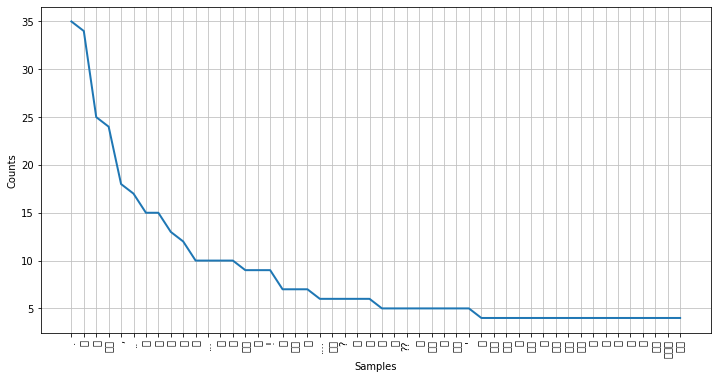

['.', '이', '의', '영화', ',', '..', '은', '는', '도', '가', '들', '...', '에', '을', '평점', '를', '!', '뭐', '에서', '그', '....', '이다', '?', '못', '게', '만', '로', '??', '말', '이건']


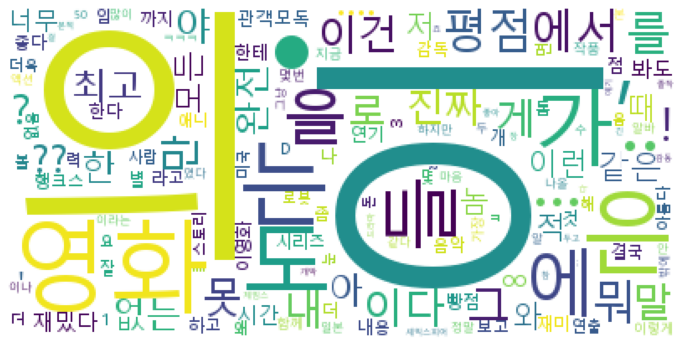

In [47]:
# plot word cloud
from konlpy.tag import Okt
okt = Okt()
tmptmp = []
for tmp in train_data:
    tmptmp.extend(okt.morphs(tmp))    
#     tmptmp.extend(okt.nouns(tmp))
    
# stopword를 등록한 다음에 다시 그래프를 그려보자
ko = nltk.Text(tmptmp)
plt.figure(figsize=(12,6))
ko.plot(50)                 # 빈도수가 높은 단어 50개를 그래프에 출력
plt.show()

# wordcloud 그리기
data = ko.vocab().most_common(150) #wordcloud로 출력할 단어의 갯수 150개
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2,
                      background_color='white',).generate_from_frequencies(dict(data))
# wordcloud = WordCloud(relative_scaling=0.2, background_color='white',).generate_from_frequencies(dict(data))

print(list(wordcloud.words_)[:30])
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47952 (\N{HANGUL SYLLABLE MWEO}) missing from current font.
  fig.canvas.pr

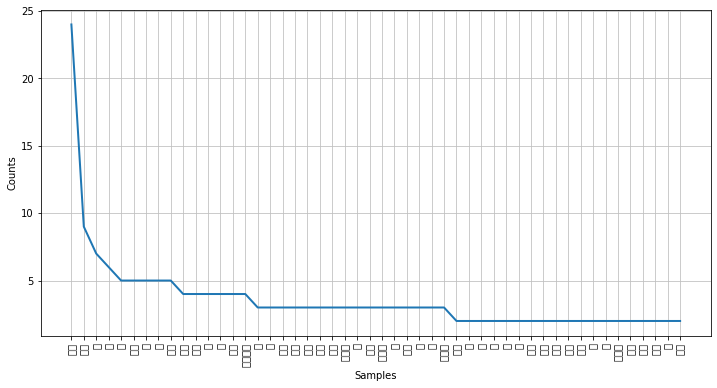

['영화', '평점', '뭐', '이', '말', '이건', '그', '내', '진짜', '완전', '최고', '때', '놈', '시간', '관객모독', '점', '더', '음악', '내용', '연기', '감독', '재미', '시리즈', '좀', '보고', '이영화', '것', '빵점', '볼', '톰']


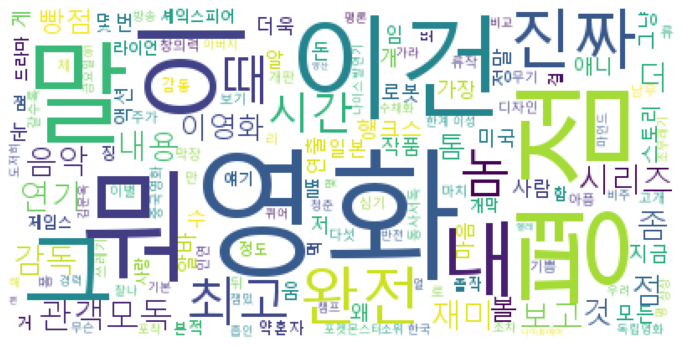

In [50]:
# plot word cloud only noun
from konlpy.tag import Okt
okt = Okt()
tmptmp = []
for tmp in train_data:
#     tmptmp.extend(okt.morphs(tmp))    
    tmptmp.extend(okt.nouns(tmp))
    
# stopword를 등록한 다음에 다시 그래프를 그려보자
ko = nltk.Text(tmptmp)
plt.figure(figsize=(12,6))
ko.plot(50)  # 빈도수가 높은 단어 50개를 그래프에 출력
plt.show()

# wordcloud 그리기
data = ko.vocab().most_common(150) #wordcloud로 출력할 단어의 갯수 150개


from wordcloud import WordCloud

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                      background_color='white',).generate_from_frequencies(dict(data))
# wordcloud = WordCloud(relative_scaling=0.2, background_color='white',).generate_from_frequencies(dict(data))
print(list(wordcloud.words_)[:30])
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 언어 분석 완료!!

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


HTML b'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n  <meta name="description" content="Keras documentation">\n  <meta name="author" content="Keras Team">\n\n  <title>Keras: the Python deep learning API</title>\n\n  <!-- Bootstrap core CSS -->\n  <link href="css/bootstrap.min.css" rel="stylesheet">\n\n  <!-- Custom fonts for this template -->\n  <link href="https://fonts.googleapis.com/css?family=Open+'

## 토큰
 ['', 'DOCTYPE', 'html', 'html', 'lang', 'en', 'head', 'meta', 'charset', 'utf', '8', 'meta', 'name', 'viewport', 'content', 'width', 'device', 'width', 'initial', 'scale']

## html 정제
 ['Keras:', 'the', 'Python', 'deep', 'learning', 'API', 'Simple.', 'Flexible.', 'Powerful.', 'Get', 'started', 'API', 'docs', 'Guides', 'Examples', 'Deep', 'learning', 'for', 'humans.', 'Keras']


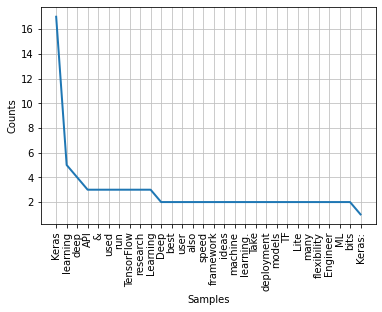

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
import random

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# 페이지의 html을 긁어온다

# URL = 'https://pytorch.org/'
URL = 'https://keras.io/'

response = urllib.request.urlopen(URL)
html = response.read()
print("HTML", html[:500])

tokens = re.split('\W+', html.decode('utf-8'))
print("\n## 토큰\n", tokens[:20])

clean = BeautifulSoup(html, 'html.parser').get_text()  # html cleansing

tokens = clean.split()
print("\n## html 정제\n", tokens[:20])

stop_word = set(stopwords.words('english'))  # 불용어
clean_tokens = []
for tok in tokens:
    if (tok.lower() not in stop_word):  # 길이가 1 이상 인 것 !! stop word가 아닌 것 !
        clean_tokens.append(tok)

# FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
Freq_dist_nltk = nltk.FreqDist(clean_tokens)
Freq_dist_nltk.plot(30, cumulative=False)